# Analyzing movie ratings

Thit notebook analyzes movie ratings to check whether the fandango rating system has adjusted it's system after the critiscism of Walt Hickey in his article (https://fivethirtyeight.com/features/fandango-movies-ratings/).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [3]:
fandango_b = pd.read_csv('fandango_score_comparison.csv')
fandango_a = pd.read_csv('movie_ratings_16_17.csv')


In [4]:
fandango_b_rel = fandango_b[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                             'Fandango_votes', 'Fandango_Difference']].copy()
fandango_a_rel = fandango_a[['movie', 'year', 'fandango']].copy()

## Population of interest for our analysis 

For the analysis we are looking into all ratings which are made by Fandango. There is no relevance to look only into specific time periods or other restricting criteria.


## Deep dive into provided datasets 

### Are the samples random?

As reading the Readme files of the github repositories is getting clear that the datapoints in the samples weren't chosen randomly:

<b>Hicks</b>:
For making his analyzis Hicks only chose movies which have at least 30 fan reviews on Fandango. 

<b>Other sample</b>:
The movie has been releast in 2017 or 2017 and only the most popular movies (with a significant number of votes) are included.

### Adjustment of analysis goal
As the sample data of our datasets aren't really random, we need to adjust our search goal a litte bit so its fiting the data from the used datasets. Therefor a new goal can be as followed:

<b>Finding out whether are are differences in the Fandango rating system for popular movies in 2015 and popular moview in 2016. </b>



## Isolate needed sample 

In [5]:
fandango_b_rel['Year'] = fandango_b_rel['FILM'].str[-5:-1]
fandango_2015 = fandango_b_rel[fandango_b_rel['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [6]:
fandango_2016 = fandango_a_rel[fandango_a_rel['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Compare distrubutions of rating values

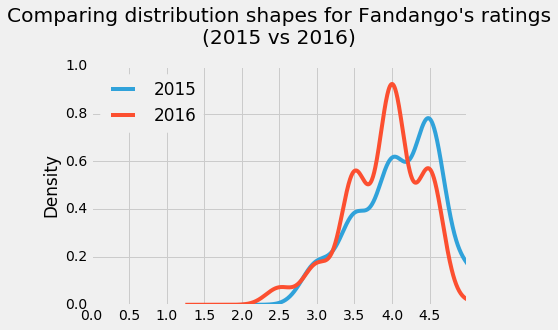

In [7]:
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlim(0,5) 
plt.xticks(arange(0,5,0.5))
plt.show()

<b>What is the shape of distribution?</b>
For the 2015 density plot the distribution is left skewed. For the 2016 distribution it is more normal distributed but still somehow left skewed.
<b>How do the shapes compare?</b>
One can say that in the lower rating area both distributions have similiar probability values for ratings. However in the higer area of ratings the 2016 distribution has a lower maximum (4 stars) compared to the 2015 distribution (4.5 stars)
<b>Is there evidence that suggests the Fandango rating changed?</b>
There is little evidence that the rating changed because one can see that the distribution of the 2016 ratings moved completly a bit to the lower rating values.


## Comparing frequency distribution tables

In [8]:
fandango_2015['Fandango_Stars'].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [9]:
fandango_2016['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

In [10]:
print("#ratings in sample 2015: " +  str(len(fandango_2015['Fandango_Stars'])))
print("#ratings in sample 2016: " +  str(len(fandango_2016['fandango'])))

#ratings in sample 2015: 129
#ratings in sample 2016: 191


As the absoulte numbers indicate, the 2015 data set contains less data than the 2016 dataset. That's why it isnt making so much sense to compare then in absoulte frequencies. So we can have a look at relative frequencies. 

In [11]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [12]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at the relative distributions one can say that in both datasets more than 80% of the data is between 3 and 4.5 stars. The biggst difference nevertheless is that in the 2016 dataset the most ratings where 4 stars where as in the 2015 dataset it was 4.5 stars. So in the end there is a clear difference recognizable.

In [21]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()

print(mean_2015)
print(median_2015)
print(mode_2015[0])

print(mean_2016)
print(median_2016)
print(mode_2016[0])

4.0852713178294575
4.0
4.5
3.887434554973822
4.0
4.0


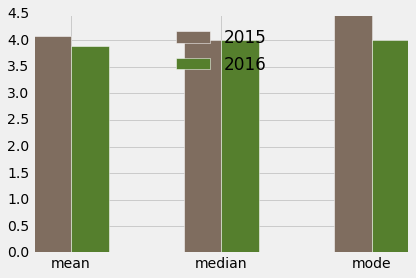

In [29]:
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = [mean_2015, median_2015, mode_2015[0]]
bars2 = [mean_2016, median_2016, mode_2016[0]]

# Set position of bar on X axis
r1 = arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='2015')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='2016')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ['mean', 'median', 'mode'])
 
# Create legend & Show graphic
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()


As a conlcusion of comparing mean, median and mode you can say that we only have a marginal difference.

## Conclusion

The analysis showed that there is a small difference between the 2015 and 2015 datasets. The values for the 2016 dataset on on average a bit smaller than those in 2016